<h1>ECE521 Assignment 1</h1>

<h2> 1.1 </h2>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with np.load("../data/notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]
    
    trainData = trainData.reshape(trainData.shape[0],-1)
    validData = validData.reshape(validData.shape[0],-1)
    testData = testData.reshape(testData.shape[0],-1)
    
#     print trainData.shape
#     print trainTarget.shape
#     print validData.shape
#     print validTarget.shape
#     print testData.shape
#     print testTarget.shape

In [6]:
def buildGraph(decay_rate, learning_rate):
    # Variable creation
    W = tf.Variable(tf.truncated_normal(shape=[784,1], stddev=0.5), name='weights')
    b = tf.Variable(0.0, name='biases')
    X = tf.placeholder(tf.float32, [None, 784], name='input_x')
    y_target = tf.placeholder(tf.float32, [None,1], name='target_y')

    # Graph definition
    y_predicted = tf.sigmoid(tf.matmul(X,W) + b)

    # Error definition
    error = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y_target, y_predicted),
                                  name='mean_squared_error') + \
             0.5 * decay_rate * tf.reduce_sum(tf.cast(tf.square(W), tf.float32))

    # Training mechanism
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train = optimizer.minimize(loss=error)
    return W, b, X, y_target, y_predicted, error, train

def getRandomBatch(trainData, trainTarget, size):
    idx = np.random.choice(trainData.shape[0], size, replace=False)
    return trainData[idx,:], trainTarget[idx,:]

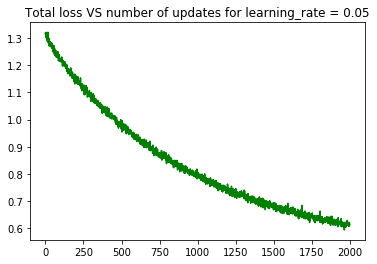

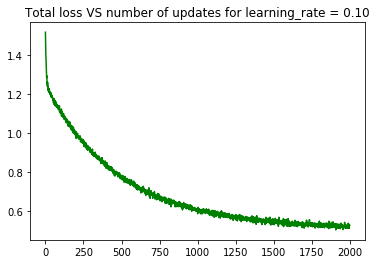

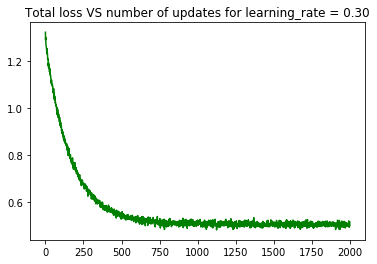

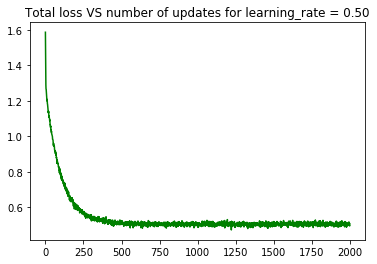

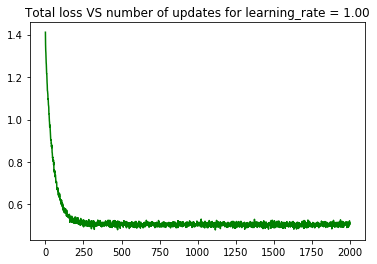

In [10]:
decay_rate = 0.01
batch_size = 500
learning_rate_list = [ 0.05, 0.1, 0.3, 0.5, 1]
for learning_rate in learning_rate_list: 
    W, b, X, y_target, y_predicted, error, train = buildGraph(decay_rate, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    loss_recorder = np.array([])
    
    numIteration = 2000
    for itr in range(numIteration):
        batch_xs, batch_ys = getRandomBatch(trainData, trainTarget, batch_size)
        loss, _ = sess.run([error, train], feed_dict={X: batch_xs, y_target: batch_ys})
        loss_recorder = np.append(loss_recorder, loss)
    plt.plot(np.arange(numIteration), loss_recorder, 'g')
    #plt.axis([0,2000, 0, 2])
    plt.title("Total loss VS number of updates for learning_rate = %0.2f"%(learning_rate))
    plt.show()